# REPERTOIRE

In [68]:
# C:\Users\dieud\Documents\OPENCLASSROOMS\FORMATION_DATA_SCIENTIST\PROJETS_DS_OCR\PROJET6
# PROJET5_DATA_SCIENTIST_OCR
# Changement du repertoire: A ne plus changer.
import os
os.chdir('C://Users//dieud//Documents//OPENCLASSROOMS//FORMATION_DATA_SCIENTIST//PROJETS_DS_OCR//P6_FIN')

# Préparation du dataset

# IMPORTATION DES LIBRAIRIES UTILISEES

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
from os import listdir
import sys
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, roc_auc_score, roc_curve
from glob import glob
from sklearn import preprocessing
import cv2

import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, GlobalAveragePooling1D, Flatten, Dense, Dropout 
from tensorflow.keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

pd.set_option('display.max_column', 100)
pd.set_option('display.max_row', 1100)

# os.environ["TF_KERAS"]='1'
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Versions
print('Version des librairies utilisées :')
print('NumPy                 : ' + np.version.full_version)
print('Pandas                : ' + pd.__version__)
print('Python                : ' + sys.version)
print('Seaborn               : ' + sns.__version__)
print('Cv2                   : ' + cv2.__version__)

Num GPUs Available:  0
Version des librairies utilisées :
NumPy                 : 1.24.3
Pandas                : 1.5.3
Python                : 3.10.11 | packaged by Anaconda, Inc. | (main, Apr 20 2023, 18:56:50) [MSC v.1916 64 bit (AMD64)]
Seaborn               : 0.12.2
Cv2                   : 4.8.0


# RESUME DES DONNEES TEXTUELLES.

In [70]:
path = "Images/"
list_photos = [file for file in listdir(path)]
print(len(list_photos))
df = pd.read_csv('C://Users//dieud//Documents//OPENCLASSROOMS//FORMATION_DATA_SCIENTIST//PROJETS_DS_OCR//P6_FIN//DATA//df_tokens1', index_col=0)

1050


In [71]:
list_labels = ["Baby Care", "Beauty and Personal Care", "Computers", "Home Decor & Festive Needs", "Home Furnishing", "Kitchen & Dining", "Watches"]
label_no_name = "no_name "

def photo_class(photo) :
    for label in list_labels :
        if label in photo[24:] : 
            return label
    return label_no_name
    
#data_path = glob(path+'*/*.jp*')
data_path = path + df['image']
#data_test_path = glob(path_test+'*/*.jp*')
dic= {'Baby Care':0, 'Beauty and Personal Care':1, 'Computers':2, 'Home Decor & Festive Needs':3, 'Home Furnishing':4, 'Kitchen & Dining':5, 'Watches':6}

def data_fct(path) :
    list_photos = [file for file in path]
    print(len(list_photos))
    data = pd.DataFrame()
    data["image_path"] = list_photos
    #data["label_name"] = data["image_path"].apply(lambda x : photo_class(x))
    data["label_name"] = df["Catégorie"]
    data["label"] = df['Catégorie'].map(dic)
    return data

data = data_fct(data_path)

le = preprocessing.LabelEncoder()
le.fit(data["label_name"])
data["label"] = le.transform(data["label_name"])

data

1050


,image_path,label_name,label
0,Images/55b85ea15a1536d46b7190ad6fff8ce7.jpg,Home Furnishing,4
1,Images/7b72c92c2f6c40268628ec5f14c6d590.jpg,Baby Care,0
2,Images/64d5d4a258243731dc7bbb1eef49ad74.jpg,Baby Care,0
3,Images/d4684dcdc759dd9cdf41504698d737d8.jpg,Home Furnishing,4
4,Images/6325b6870c54cd47be6ebfbffa620ec7.jpg,Home Furnishing,4
5,Images/893aa5ed55f7cff2eccea7758d7a86bd.jpg,Watches,6
6,Images/f355cc1ccb08bd0d283ed979b7ee7515.jpg,Watches,6
7,Images/dd0e3470a7e6ed76fd69c2da27721041.jpg,Watches,6
8,Images/41384da51732c0b4df3de8f395714fbb.jpg,Watches,6
9,Images/710ed5f2393a4b9e8823aa0029f71f93.jpg,Watches,6


In [72]:
#
data.groupby("label").count()

,image_path,label_name
label,,
0,150,150
1,150,150
2,150,150
3,150,150
4,150,150
5,150,150
6,150,150


Baby Care


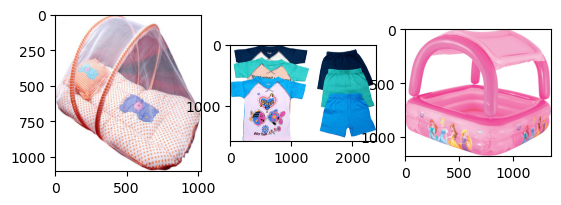

Beauty and Personal Care


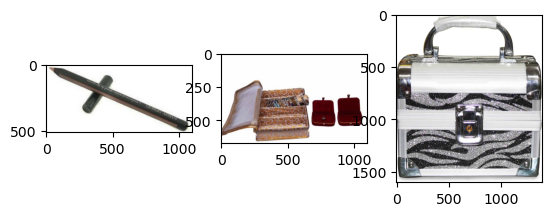

Computers


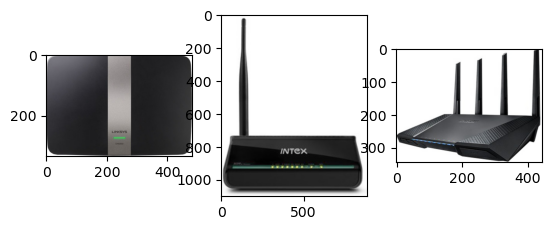

Home Decor & Festive Needs


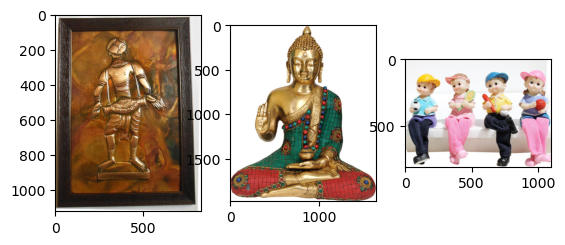

Home Furnishing


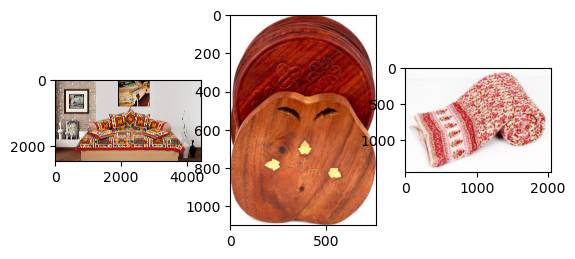

Kitchen & Dining


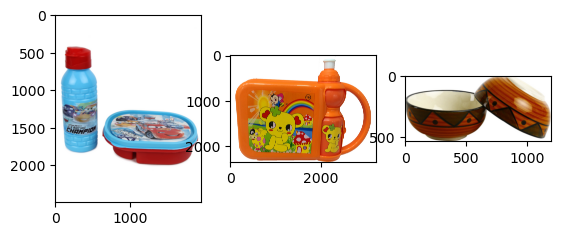

Watches


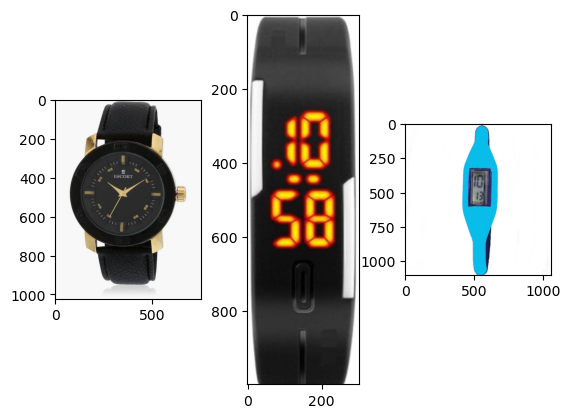

In [73]:
from matplotlib.image import imread

def list_fct(name) :
    list_image_name = [data["image_path"][i] for i in range(len(data)) if data["label_name"][i]==name]
    return list_image_name

list_Baby_Care=[data["image_path"][i] for i in range(len(data)) if data["label_name"][i]=="Baby Care"]
list_Beauty_Personal_Care=[data["image_path"][i] for i in range(len(data)) if data["label_name"][i]=="Beauty and Personal Care"]
list_Computers=[data["image_path"][i] for i in range(len(data)) if data["label_name"][i]=="Computers"]
list_Home_Decor_Festive_Needs=[data["image_path"][i] for i in range(len(data)) if data["label_name"][i]=="Home Decor & Festive Needs"]
list_Home_Furnishing=[data["image_path"][i] for i in range(len(data)) if data["label_name"][i]=="Home Furnishing"]
list_Kitchen_Dining=[data["image_path"][i] for i in range(len(data)) if data["label_name"][i]=="Kitchen & Dining"]
list_Watches=[data["image_path"][i] for i in range(len(data)) if data["label_name"][i]=="Watches"]

for name in list_labels :
    print(name)
    # print("-------")
    for i in range(3):
        plt.subplot(130 + 1 + i)
        filename = list_fct(name)[i+10]
        image = imread(filename)
        plt.imshow(image)
    plt.show()

# Etape 1 : étude de faisabilité

## Création du modèle pré-entraîné

In [74]:
base_model = VGG16()
model = Model(inputs=base_model.inputs, outputs=base_model.layers[-2].output)

print(model.summary())

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

## Création des features des images

In [75]:
images_features = []
i=0 
for image_file in data["image_path"] :
    if i%100 == 0 : print(i)
    i +=1
    image = load_img(image_file, target_size=(224, 224))
    image = img_to_array(image) 
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)
    images_features.append(model.predict(image, verbose=0)[0]) # predict from pretrained model

images_features = np.asarray(images_features)
images_features.shape

0
100
200
300
400
500
600


C:\Users\dieud\anaconda3\envs\py31011\lib\site-packages\PIL\Image.py:3167: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


700
800
900
1000


(1050, 4096)

## Réduction dimension et analyse

### Réduction de dimension PCA

In [76]:
from sklearn import manifold, decomposition
# Dimension du dataset avant et après réduction de dimension avec un PCA
print("Dimensions dataset avant réduction PCA : ",  images_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(images_features)
print("Dimensions dataset après réduction PCA : ",  feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 4096)
Dimensions dataset après réduction PCA :  (1050, 803)


### Réduction de dimension T-SNE et affichage des images selon vraies classes

In [77]:
from sklearn import manifold, decomposition
import time

temps1 = time.time()

tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

duration1=time.time()-temps1
print("temps de T-SNE : ", "%15.2f" % duration1, "secondes")

temps de T-SNE :             6.21 secondes


C:\Users\dieud\AppData\Local\Temp\ipykernel_61536\1477036996.py:5: UserWarning: 
The palette list has fewer values (4) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


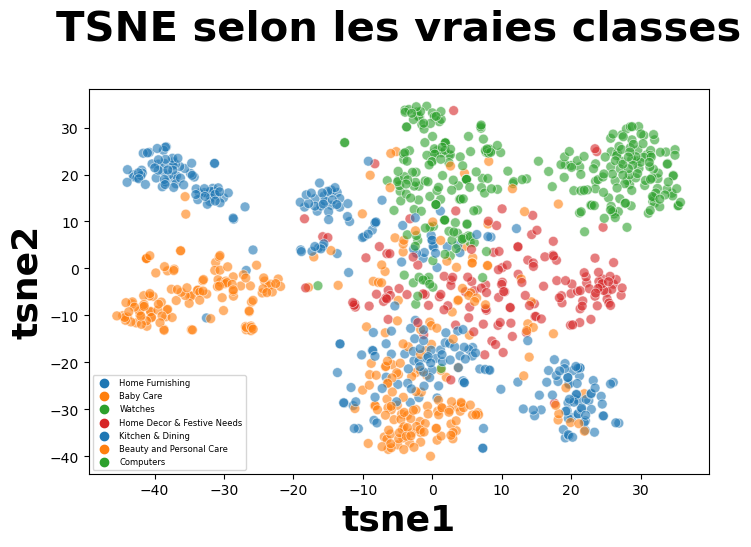

In [78]:
df_tsne = pd.DataFrame(X_tsne, columns=['tsne1', 'tsne2'])
df_tsne["class"] = data["label_name"]

plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="class",
    palette=sns.color_palette('tab10', n_colors=4), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 6}) 

plt.show()


* L'analyse graphique montre visuellement qu'il est réalisable de séparer automatiquement les images selon leurs vraies classes
* Ceci suffit à démontrer la faisabilité de réaliser ultérieurement une classification supervisée pour déterminer automatiquement les classes des images
* Cette étape 1 est très rapide à mettre en oeuvre. Une conclusion négative sur la faisabilité aurait éviter de réaliser des traitements beaucoup plus lourd de classification supervisée
* Cette démarche en 2 étapes (1. Faisabilité, 2. Classification supervisée si étape 1 OK) s'inscrit dans une démarche agile de tout projet Data

### Création de clusters à partir du T-SNE et affichage des images selon clusters
* Attention : ici, il ne s'agit pas de faire une classification non supervisée, mais simplement, par une mesure de l'ARI, de conforter l'analyse graphique précédente qui démontre la faisabilité de réaliser ultérieurement une classification supervisée. Cette mesure de l'ARI nécessite de créer des clusters théoriques via KMeans
* Il s'agit donc de réaliser une mesure de ce que nous voyons graphiquement, donc à partir des données en sortie du t-sne
* Pour réaliser une classification non supervisée, il aurait fallu repartir des données avant t-sne
* Dans la démarche en 2 étapes, il n'est pas utile de réaliser une classification non supervisée, une classification supervisée est bien plus performante. Même le calcul de l'ARI n'est pas indispensable, nous pourrions passer directement du graphique t-sne précédent à l'étape 2 de classification supervisée
* Il n'est donc pas utile de passer du temps à optimiser l'ARI, un ordre de grandeur suffit pour conforter le 1er graphique t-sne. D'ailleurs la meilleure solution de feature engineering ne génère pas toujours le meilleur ARI. L'analyse graphique t-sne est bien plus riche d'enseignement


In [79]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, n_init=100)
cls.fit(X_tsne)

C:\Users\dieud\anaconda3\envs\py31011\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


KMeans(n_clusters=7, n_init=100)

C:\Users\dieud\AppData\Local\Temp\ipykernel_61536\766580143.py:4: UserWarning: 
The palette list has fewer values (4) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


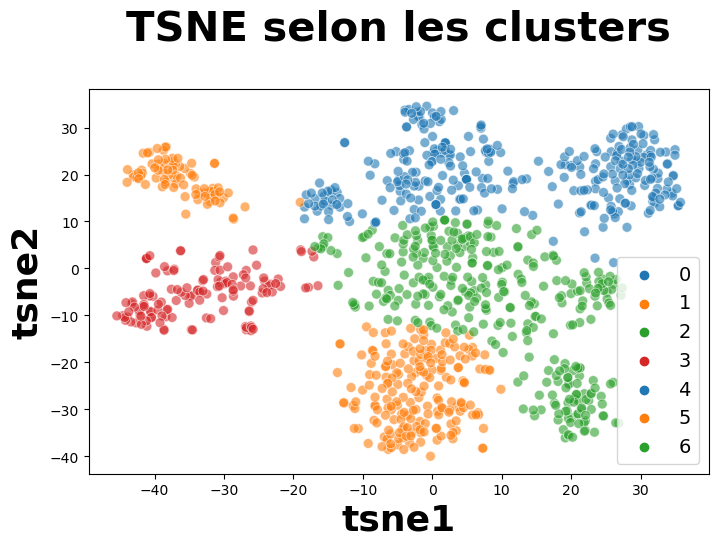

ARI :  0.44602754106023157


In [80]:
df_tsne["cluster"] = cls.labels_

plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=4), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

labels = data["label"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

In [81]:
# Analyse d'images "Beauty and Personal Care" affectées au cluster 1 considérées comme "Baby Care"

list_Beauty_and_Personal_Care_0 = [i for i in range(len(data["image_path"])) \
                if (data.iloc[i]['label_name']=='Beauty and Personal Care') and (df_tsne.iloc[i]['cluster']==1)]
list_Beauty_and_Personal_Care_0[0]
#list_Computers_0

98

tsne1       2.861009
tsne2      -9.266745
class      Baby Care
cluster            2
Name: 220, dtype: object


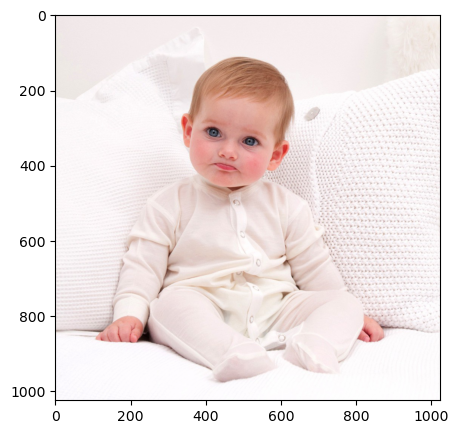

In [82]:
# Affichage image "Beauty and Personal Care" considérée comme "Baby Care".
id = 220
print(df_tsne.iloc[id])
fig = plt.figure(figsize = (8, 5))
# plt.subplot(130 + 1 + i)
filename = data["image_path"][id]
image = imread(filename)
plt.imshow(image)
plt.show()



* Analyse : le modèle pré-entraîné confond "Baby Care" avec "Beauty & Personal Care".

### Analyse par classes

In [83]:
conf_mat = metrics.confusion_matrix(labels, cls.labels_)
print(conf_mat)

[[  1 108  25   4   1   1  10]
 [  8   6  13 116   1   1   5]
 [109   1  38   1   1   0   0]
 [  6   3  78   1   7   0  55]
 [  1  78   4   0   0   0  67]
 [ 34   0  31   6   0  79   0]
 [ 13   0   2   0 135   0   0]]


In [84]:
def conf_mat_transform(y_true,y_pred) :
    conf_mat = metrics.confusion_matrix(y_true,y_pred)
    
    corresp = np.argmax(conf_mat, axis=0)
    print ("Correspondance des clusters : ", corresp)
    # y_pred_transform = np.apply_along_axis(correspond_fct, 1, y_pred)
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    
    return labels['y_pred_transform']

In [85]:
cls_labels_transform = conf_mat_transform(labels, cls.labels_)
conf_mat = metrics.confusion_matrix(labels, cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(labels, cls_labels_transform))

Correspondance des clusters :  [2 0 3 1 6 5 4]
[[108   4   1  25  10   1   1]
 [  6 116   8  13   5   1   1]
 [  1   1 109  38   0   0   1]
 [  3   1   6  78  55   0   7]
 [ 78   0   1   4  67   0   0]
 [  0   6  34  31   0  79   0]
 [  0   0  13   2   0   0 135]]

              precision    recall  f1-score   support

           0       0.55      0.72      0.62       150
           1       0.91      0.77      0.83       150
           2       0.63      0.73      0.68       150
           3       0.41      0.52      0.46       150
           4       0.49      0.45      0.47       150
           5       0.98      0.53      0.68       150
           6       0.93      0.90      0.92       150

    accuracy                           0.66      1050
   macro avg       0.70      0.66      0.67      1050
weighted avg       0.70      0.66      0.67      1050



<Axes: >

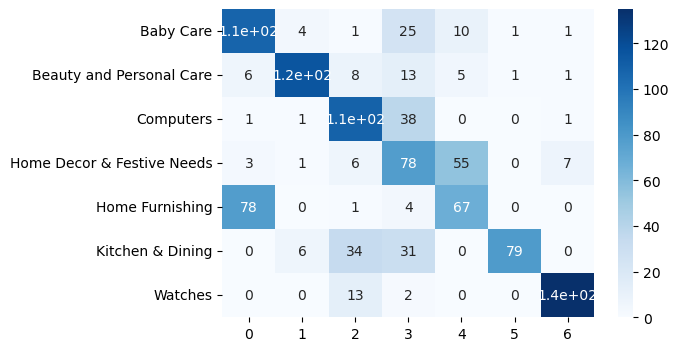

In [86]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")

* La classe la moins bien prédite est "Home Furnishing"

In [87]:
ARI_SIFT   = 0.0025621017918463513 * 10
ARI_ORB    = 0.000676808252163749 * 10
ARI_VGG16  = 0.44602754106023157

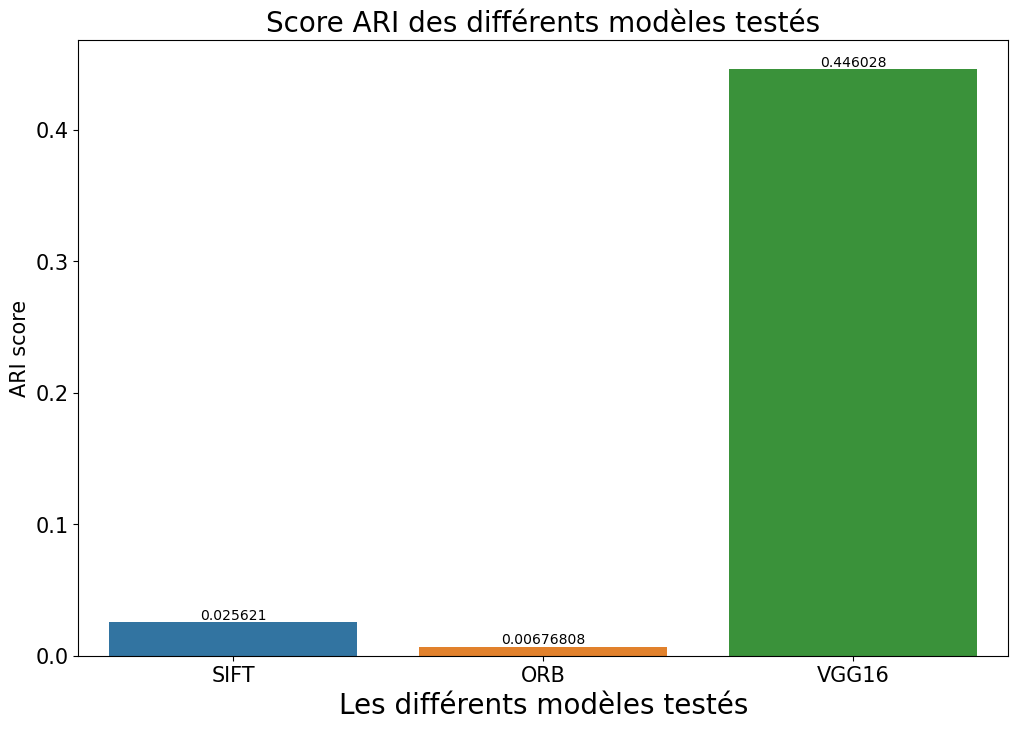

In [88]:
listeARI = [ARI_SIFT, ARI_ORB, ARI_VGG16]
listeModeles = ['SIFT', 'ORB', 'VGG16']

fig = plt.figure(figsize=(12, 8))
ax = sns.barplot(x=listeModeles, y=listeARI)
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Score ARI des différents modèles testés',
          fontsize=20)
plt.xlabel('Les différents modèles testés', fontsize=20)
plt.ylabel('ARI score', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
# plt.xticks(rotation=45)
plt.show()

# Etape 2 : classification supervisée
4 approches sont présentées :
* Une approche simple par préparation initiale de l'ensemble des images avant classification supervisée
* Une approche par data generator, permettant facilement la data augmentation. Les images sont directement récupérées à la volée dans le repertoire des images
* Une approche récente proposée par Tensorflow.org par DataSet, sans data augmentation
* Une approche par  DataSet, avec data augmentation intégrée au modèle : layer en début de modèle


## Création du modèle de classification

In [23]:
def create_model_fct() :
    # Récupération modèle pré-entraîné
    model0 = VGG16(include_top=False, weights="imagenet", input_shape=(224, 224, 3))

    # Layer non entraînables = on garde les poids du modèle pré-entraîné
    for layer in model0.layers:
        layer.trainable = False

    # Récupérer la sortie de ce réseau
    x = model0.output
    # Compléter le modèle
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(7, activation='softmax')(x)

    # Définir le nouveau modèle
    model = Model(inputs=model0.input, outputs=predictions)
    # compilation du modèle 
    model.compile(loss="categorical_crossentropy", optimizer='rmsprop', metrics=["accuracy"])

    print(model.summary())
    
    return model
    

## Approche préparation initiale des images

In [24]:
def image_prep_fct(data) :
    prepared_images = []
    for image_num in range(len(data['image_path'])) :
        img = (load_img(
            data['image_path'][image_num],
            target_size=(224, 224)))
        img = img_to_array(img)
        img = img.reshape((img.shape[0], img.shape[1], img.shape[2]))
        img = preprocess_input(img)
        prepared_images.append(img)
        prepared_images_np = np.array(prepared_images)
    return prepared_images_np
    
images_np = image_prep_fct(data)
print(images_np.shape)
images_np_test = image_prep_fct(data)
print(images_np_test.shape)

C:\Users\dieud\anaconda3\envs\py31011\lib\site-packages\PIL\Image.py:3167: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


(1050, 224, 224, 3)
(1050, 224, 224, 3)


In [25]:
X = images_np
y = to_categorical(data['label'])

X_test = images_np_test
y_test = to_categorical(data['label'])

y

array([[0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [26]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)
X_train.shape

(787, 224, 224, 3)

In [27]:
# Création du modèle
with tf.device('/gpu:0'): 
    model1 = create_model_fct()

# Création du callback
model1_save_path1 = "./model1_best_weights.h5"
checkpoint = ModelCheckpoint(model1_save_path1, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
callbacks_list = [checkpoint, es]


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [28]:
# Entraîner sur les données d'entraînement (X_train, y_train)
with tf.device('/gpu:0'): 
    history1 = model1.fit(X_train, y_train, epochs=50, batch_size=64, 
                       callbacks=callbacks_list, validation_data=(X_val, y_val), verbose=1)


Epoch 1/50
13/13 [==============================] - ETA: 0s - loss: 4.8745 - accuracy: 0.4765
Epoch 1: val_loss improved from inf to 1.19955, saving model to .\model1_best_weights.h5
13/13 [==============================] - 78s 6s/step - loss: 4.8745 - accuracy: 0.4765 - val_loss: 1.1996 - val_accuracy: 0.7529
Epoch 2/50


C:\Users\dieud\anaconda3\envs\py31011\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


13/13 [==============================] - ETA: 0s - loss: 1.8325 - accuracy: 0.6823
Epoch 2: val_loss did not improve from 1.19955
13/13 [==============================] - 80s 6s/step - loss: 1.8325 - accuracy: 0.6823 - val_loss: 1.3102 - val_accuracy: 0.7719
Epoch 3/50
13/13 [==============================] - ETA: 0s - loss: 1.0899 - accuracy: 0.7700
Epoch 3: val_loss improved from 1.19955 to 1.08288, saving model to .\model1_best_weights.h5
13/13 [==============================] - 85s 7s/step - loss: 1.0899 - accuracy: 0.7700 - val_loss: 1.0829 - val_accuracy: 0.8061
Epoch 4/50
13/13 [==============================] - ETA: 0s - loss: 0.9209 - accuracy: 0.7903
Epoch 4: val_loss improved from 1.08288 to 0.87674, saving model to .\model1_best_weights.h5
13/13 [==============================] - 91s 7s/step - loss: 0.9209 - accuracy: 0.7903 - val_loss: 0.8767 - val_accuracy: 0.8099
Epoch 5/50
13/13 [==============================] - ETA: 0s - loss: 0.6330 - accuracy: 0.8424
Epoch 5: val_lo

In [29]:
# Score du dernier epoch

loss, accuracy = model1.evaluate(X_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
print()
loss, accuracy = model1.evaluate(X_val, y_val, verbose=True)
print("Validation Accuracy:  {:.4f}".format(accuracy))

25/25 [==============================] - 60s 2s/step - loss: 0.0134 - accuracy: 0.9975
Training Accuracy: 0.9975

9/9 [==============================] - 22s 2s/step - loss: 0.9024 - accuracy: 0.8137
Validation Accuracy:  0.8137


In [30]:
# Score de l'epoch optimal

model1.load_weights(model1_save_path1)

loss, accuracy = model1.evaluate(X_val, y_val, verbose=False)
print("Validation Accuracy :  {:.4f}".format(accuracy))

loss, accuracy = model1.evaluate(X_test, y_test, verbose=False)
print("Test Accuracy       :  {:.4f}".format(accuracy))


Validation Accuracy :  0.8099
Test Accuracy       :  0.9352


In [31]:
#pip install plot_keras_history

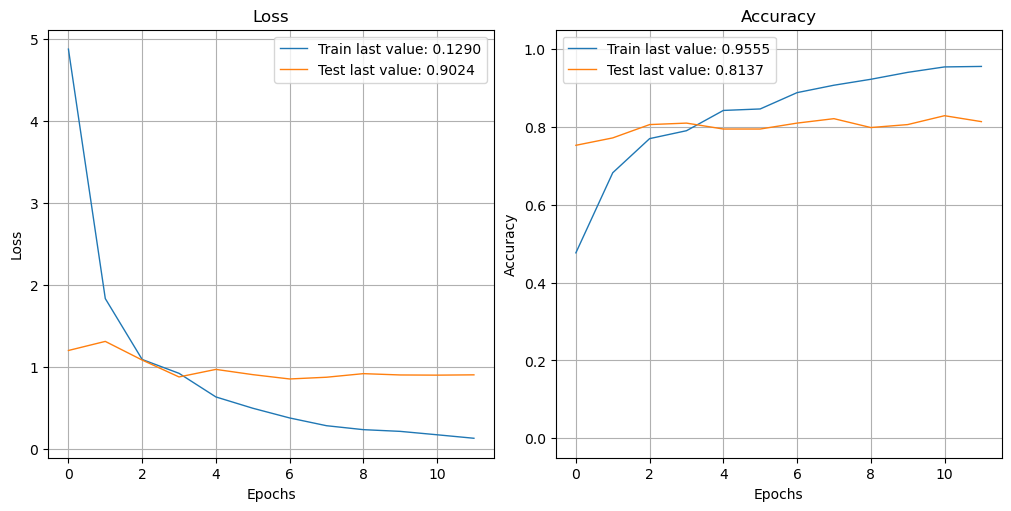

In [32]:
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt

show_history(history1)
plot_history(history1, path="standard.png")
plt.close()

In [33]:
y_val_num = np.argmax(y_val, axis=1)
y_val_pred = np.argmax(model1.predict(X_val), axis=1)
y_val_num = np.argmax(y_val, axis=1)
print(y_val_num)
print()
print(y_val_pred)

9/9 [==============================] - 19s 2s/step
[3 3 1 4 3 1 5 0 3 0 0 4 6 5 0 6 5 0 2 6 2 2 1 0 4 5 4 6 2 2 0 2 1 3 2 0 4
 0 0 1 6 6 1 1 4 4 0 6 2 3 1 2 3 6 1 4 6 1 4 0 1 6 5 1 0 6 5 3 6 0 3 4 0 0
 4 2 4 4 6 3 1 4 5 5 1 2 1 0 3 5 5 2 3 1 6 3 6 5 5 1 5 4 2 4 0 0 0 6 4 6 5
 0 4 5 5 6 1 4 2 1 4 0 3 3 2 3 4 2 0 3 3 0 5 1 3 3 1 5 0 1 0 3 5 2 0 1 5 6
 1 2 6 0 2 1 1 0 3 3 4 3 1 2 5 5 3 5 1 2 4 3 1 2 5 5 2 2 0 0 3 6 0 4 4 1 4
 4 1 3 6 3 6 5 2 5 0 2 2 1 6 2 0 6 4 3 3 5 3 4 1 4 0 5 5 5 2 5 6 3 6 4 6 2
 5 4 1 4 6 6 4 1 3 6 5 6 3 6 3 2 3 2 5 6 0 2 4 5 0 4 3 0 2 4 4 2 2 5 2 6 1
 6 6 2 1]

[3 4 1 4 3 1 5 0 3 0 0 4 6 2 5 6 5 0 2 2 2 2 1 0 4 0 4 2 2 2 0 2 1 3 2 4 4
 0 0 1 6 6 0 1 0 4 0 6 2 3 1 3 0 6 3 4 6 1 4 0 2 6 5 1 3 6 5 0 6 0 3 4 4 0
 1 1 4 0 6 3 1 4 5 5 1 2 1 0 3 5 5 2 1 1 2 3 6 5 5 1 5 4 2 3 0 0 0 6 4 6 0
 0 4 5 5 6 1 4 1 1 4 0 3 3 2 5 4 2 1 6 0 5 5 1 2 3 1 0 5 1 0 3 5 2 0 1 5 6
 1 2 6 0 2 1 1 4 3 3 4 3 5 0 5 0 3 5 1 2 4 0 1 2 5 5 2 2 0 0 5 6 0 4 4 1 4
 4 1 3 6 3 6 5 2 4 0 5 2 1 2 2 0 6 4 3

In [34]:
conf_mat = metrics.confusion_matrix(y_val_num, y_val_pred)
print(conf_mat)

[[29  1  0  1  4  3  0]
 [ 1 32  1  1  1  1  0]
 [ 1  3 32  1  0  1  0]
 [ 4  1  1 28  1  2  1]
 [ 5  1  0  1 31  0  0]
 [ 5  0  1  0  1 30  0]
 [ 1  0  5  0  0  0 31]]


In [35]:
y_val_pred_transform = conf_mat_transform(y_val_num, y_val_pred)
conf_mat = metrics.confusion_matrix(y_val_num, y_val_pred_transform)
print(conf_mat)
print()
print(metrics.classification_report(y_val_num, y_val_pred_transform))

Correspondance des clusters :  [0 1 2 3 4 5 6]
[[29  1  0  1  4  3  0]
 [ 1 32  1  1  1  1  0]
 [ 1  3 32  1  0  1  0]
 [ 4  1  1 28  1  2  1]
 [ 5  1  0  1 31  0  0]
 [ 5  0  1  0  1 30  0]
 [ 1  0  5  0  0  0 31]]

              precision    recall  f1-score   support

           0       0.63      0.76      0.69        38
           1       0.84      0.86      0.85        37
           2       0.80      0.84      0.82        38
           3       0.88      0.74      0.80        38
           4       0.82      0.82      0.82        38
           5       0.81      0.81      0.81        37
           6       0.97      0.84      0.90        37

    accuracy                           0.81       263
   macro avg       0.82      0.81      0.81       263
weighted avg       0.82      0.81      0.81       263



<Axes: >

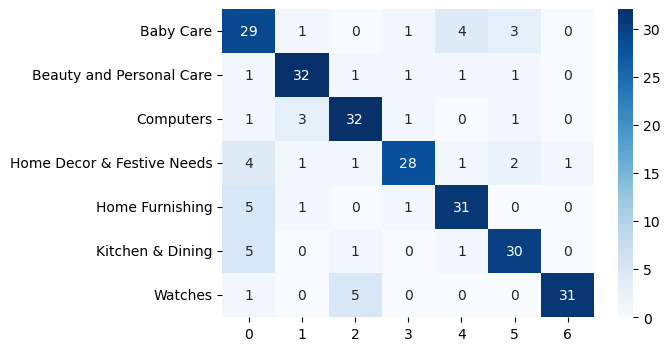

In [36]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")

* Les images "Beauty and Personal Care" contenant de la Baby Care sont désormais bien affectées à "Beauty and Personal Care" et non pas "Baby Care".

## Approche ImageDatagenerator avec data augmentation

CF https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow (noté désormais comme "deprecated", incite à utiiser l'approche suivante)

In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [38]:
# Pour mélanger les images, classées initalement par classe
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

In [39]:
batch_size = 32

def data_flow_fct(data, datagen, data_type=None) :
    data_flow = datagen.flow_from_dataframe(data, directory='',
                                x_col='image_path', y_col='label_name',
                                weight_col=None, target_size=(256, 256),
                                classes=None, class_mode='categorical',
                                batch_size=batch_size, shuffle=True, seed=42,
                                subset=data_type
                                )
    return data_flow

In [40]:
datagen_train = ImageDataGenerator(
#    featurewise_center=True,
#    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.25,
    preprocessing_function=preprocess_input)

train_flow = data_flow_fct(data, datagen_train, data_type='training')
val_flow = data_flow_fct(data, datagen_train, data_type='validation')

datagen_test = ImageDataGenerator(
    validation_split=0,
    preprocessing_function=preprocess_input)

test_flow = data_flow_fct(data, datagen_test, data_type=None)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
# datagen.fit(X_train)
# fits the model on batches with real-time data augmentation:

Found 788 validated image filenames belonging to 7 classes.
Found 262 validated image filenames belonging to 7 classes.
Found 1050 validated image filenames belonging to 7 classes.


In [41]:
# Création du modèle
with tf.device('/gpu:0'): 
    model2 = create_model_fct()

# Création du callback
model2_save_path = "./model2_best_weights.h5"
checkpoint = ModelCheckpoint(model2_save_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
callbacks_list = [checkpoint, es]


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [42]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


In [43]:
with tf.device('/gpu:0'): 
    history2 = model2.fit(train_flow,
                    validation_data=val_flow,
                    batch_size=batch_size, epochs=50, callbacks=callbacks_list, verbose=1)


Epoch 1/50
25/25 [==============================] - ETA: 0s - loss: 3.8712 - accuracy: 0.4607

C:\Users\dieud\anaconda3\envs\py31011\lib\site-packages\PIL\Image.py:3167: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



Epoch 1: val_loss improved from inf to 1.12430, saving model to .\model2_best_weights.h5
25/25 [==============================] - 106s 4s/step - loss: 3.8712 - accuracy: 0.4607 - val_loss: 1.1243 - val_accuracy: 0.7290
Epoch 2/50


C:\Users\dieud\anaconda3\envs\py31011\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


25/25 [==============================] - ETA: 0s - loss: 1.4325 - accuracy: 0.6789
Epoch 2: val_loss improved from 1.12430 to 0.81927, saving model to .\model2_best_weights.h5
25/25 [==============================] - 117s 5s/step - loss: 1.4325 - accuracy: 0.6789 - val_loss: 0.8193 - val_accuracy: 0.7595
Epoch 3/50
25/25 [==============================] - ETA: 0s - loss: 1.0200 - accuracy: 0.7234
Epoch 3: val_loss did not improve from 0.81927
25/25 [==============================] - 119s 5s/step - loss: 1.0200 - accuracy: 0.7234 - val_loss: 0.8445 - val_accuracy: 0.7786
Epoch 4/50
25/25 [==============================] - ETA: 0s - loss: 0.7399 - accuracy: 0.7817
Epoch 4: val_loss improved from 0.81927 to 0.76645, saving model to .\model2_best_weights.h5
25/25 [==============================] - 122s 5s/step - loss: 0.7399 - accuracy: 0.7817 - val_loss: 0.7664 - val_accuracy: 0.7977
Epoch 5/50
25/25 [==============================] - ETA: 0s - loss: 0.6356 - accuracy: 0.8122
Epoch 5: val

In [44]:
# Score du dernier epoch

loss, accuracy = model2.evaluate(train_flow, verbose=True)
print("Training Accuracy   : {:.4f}".format(accuracy))
print()
loss, accuracy = model2.evaluate(val_flow, verbose=True)
print("Validation Accuracy :  {:.4f}".format(accuracy))

25/25 [==============================] - 82s 3s/step - loss: 0.0917 - accuracy: 0.9695
Training Accuracy   : 0.9695

9/9 [==============================] - 31s 3s/step - loss: 0.9692 - accuracy: 0.7824
Validation Accuracy :  0.7824


In [45]:
# Score de l'epoch optimal

model2.load_weights(model2_save_path)

loss, accuracy = model2.evaluate(val_flow, verbose=False)
print("Validation Accuracy :  {:.4f}".format(accuracy))

loss, accuracy = model2.evaluate(test_flow, verbose=False)
print("Test Accuracy       :  {:.4f}".format(accuracy))


Validation Accuracy :  0.8168
Test Accuracy       :  0.9210


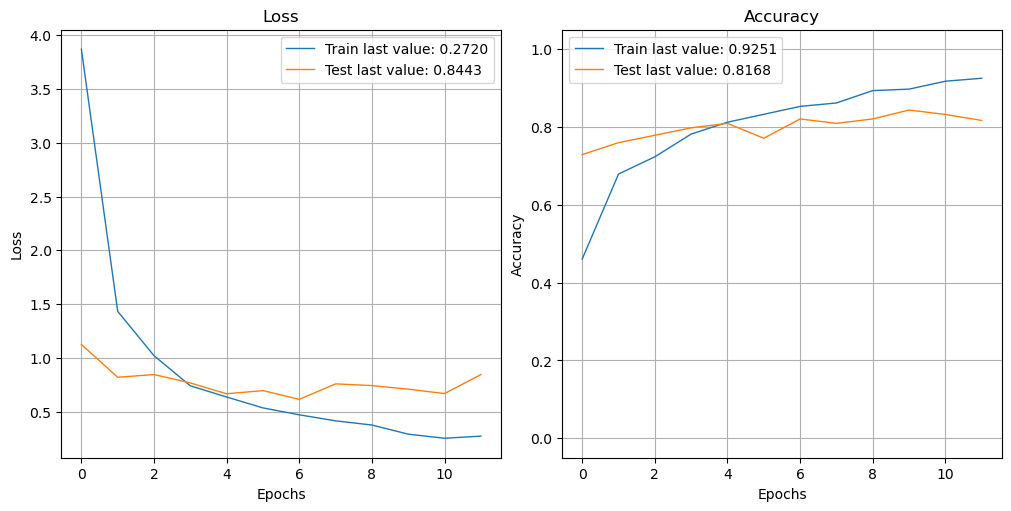

In [46]:
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt

show_history(history2)
plot_history(history2, path="standard.png")
plt.close()

## Approche nouvelle par Dataset sans data augmentation

CF https://www.tensorflow.org/tutorials/load_data/images

In [47]:
path      = "Images_Classes/"
data_path = glob(path+'*/*.jp*')
path_test = "Images_Classes/"

In [48]:
from pathlib import Path
batch_size = 32
data_path = Path(path+'/')
def dataset_fct(path, validation_split=0, data_type=None) :
    dataset = tf.keras.utils.image_dataset_from_directory(
                    path, labels='inferred', label_mode='categorical',
                    class_names=None, batch_size=32, image_size=(224, 224), shuffle=True, seed=42,
                    validation_split=validation_split, subset=data_type
                    )
    return dataset

In [49]:
from pathlib import Path
print (Path(path))
print(data_path)

Images_Classes
Images_Classes


In [50]:
import cv2
import os


In [51]:
dataset_train = dataset_fct(data_path, validation_split=0.25, data_type='training')
dataset_val = dataset_fct(data_path, validation_split=0.25, data_type='validation')
dataset_test = dataset_fct(data_path, validation_split=0, data_type=None)

Found 1050 files belonging to 7 classes.
Using 788 files for training.
Found 1050 files belonging to 7 classes.
Using 262 files for validation.
Found 1050 files belonging to 7 classes.


In [52]:
# Création du modèle
with tf.device('/gpu:0'): 
    model3 = create_model_fct()

# Création du callback
model3_save_path = "./model3_best_weights.h5"
checkpoint = ModelCheckpoint(model3_save_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
callbacks_list = [checkpoint, es]


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [53]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


In [54]:
with tf.device('/gpu:0'): 
    history3 = model3.fit(dataset_train,validation_data=dataset_val,
                          batch_size=batch_size, epochs=50, callbacks=callbacks_list, verbose=1)


Epoch 1/50
25/25 [==============================] - ETA: 0s - loss: 6.5842 - accuracy: 0.4975
Epoch 1: val_loss improved from inf to 1.54197, saving model to .\model3_best_weights.h5
25/25 [==============================] - 78s 3s/step - loss: 6.5842 - accuracy: 0.4975 - val_loss: 1.5420 - val_accuracy: 0.7863
Epoch 2/50


C:\Users\dieud\anaconda3\envs\py31011\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


25/25 [==============================] - ETA: 0s - loss: 2.2075 - accuracy: 0.6751
Epoch 2: val_loss improved from 1.54197 to 1.38466, saving model to .\model3_best_weights.h5
25/25 [==============================] - 90s 4s/step - loss: 2.2075 - accuracy: 0.6751 - val_loss: 1.3847 - val_accuracy: 0.8015
Epoch 3/50
25/25 [==============================] - ETA: 0s - loss: 1.5182 - accuracy: 0.7424
Epoch 3: val_loss improved from 1.38466 to 1.26005, saving model to .\model3_best_weights.h5
25/25 [==============================] - 90s 4s/step - loss: 1.5182 - accuracy: 0.7424 - val_loss: 1.2601 - val_accuracy: 0.7977
Epoch 4/50
25/25 [==============================] - ETA: 0s - loss: 1.0262 - accuracy: 0.7868
Epoch 4: val_loss improved from 1.26005 to 1.13937, saving model to .\model3_best_weights.h5
25/25 [==============================] - 91s 4s/step - loss: 1.0262 - accuracy: 0.7868 - val_loss: 1.1394 - val_accuracy: 0.7977
Epoch 5/50
25/25 [==============================] - ETA: 0s - l

In [55]:
# Score du dernier epoch

loss, accuracy = model3.evaluate(dataset_train, verbose=True)
print("Training Accuracy   : {:.4f}".format(accuracy))
print()
loss, accuracy = model3.evaluate(dataset_val, verbose=True)
print("Validation Accuracy :  {:.4f}".format(accuracy))

25/25 [==============================] - 68s 3s/step - loss: 0.0113 - accuracy: 0.9987
Training Accuracy   : 0.9987

9/9 [==============================] - 23s 2s/step - loss: 1.1704 - accuracy: 0.8435
Validation Accuracy :  0.8435


In [56]:
# Score de l'epoch optimal

model3.load_weights(model3_save_path)

loss, accuracy = model3.evaluate(dataset_val, verbose=False)
print("Validation Accuracy :  {:.4f}".format(accuracy))

loss, accuracy = model3.evaluate(dataset_test, verbose=False)
print("Test Accuracy       :  {:.4f}".format(accuracy))


Validation Accuracy :  0.8206
Test Accuracy       :  0.9410


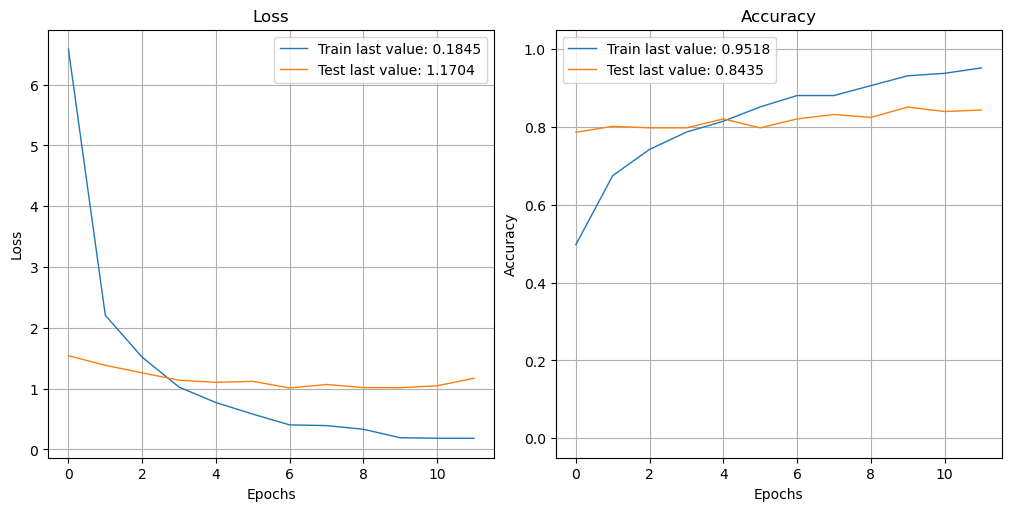

In [57]:
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt

show_history(history3)
plot_history(history3, path="standard.png")
plt.close()

## Approche nouvelle par Dataset avec data augmentation intégrée au modèle

CF https://www.tensorflow.org/tutorials/images/data_augmentation

In [58]:
batch_size = 32

def dataset_fct(path, validation_split=0, data_type=None) :
    dataset = tf.keras.utils.image_dataset_from_directory(
                    path, labels='inferred', label_mode='categorical',
                    class_names=None, batch_size=batch_size, image_size=(224, 224), shuffle=True, seed=42,
                    validation_split=validation_split, subset=data_type
                    )
    return dataset

In [59]:
dataset_train = dataset_fct(path, validation_split=0.25, data_type='training')
dataset_val = dataset_fct(path, validation_split=0.25, data_type='validation')
dataset_test = dataset_fct(path_test, validation_split=0, data_type=None)

Found 1050 files belonging to 7 classes.
Using 788 files for training.
Found 1050 files belonging to 7 classes.
Using 262 files for validation.
Found 1050 files belonging to 7 classes.


In [60]:
def resize_and_rescale(image, label):
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    image = (image / 255.0)
    return image, label



In [61]:
def create_model_fct2() :
    # Data augmentation
    data_augmentation = Sequential([
        RandomFlip("horizontal", input_shape=(224, 224, 3)),
        RandomRotation(0.1),
        RandomZoom(0.1),
        # Rescaling(1./127.5, offset=-1.0)
      ])
    
    # Récupération modèle pré-entraîné
    model_base = VGG16(include_top=False, weights="imagenet", input_shape=(224, 224, 3))
    for layer in model_base.layers:
        layer.trainable = False

    # Définition du nouveau modèle
    model = Sequential([
                data_augmentation,
                Rescaling(1./127.5, offset=-1),
                model_base,
                GlobalAveragePooling2D(),
                Dense(256, activation='relu'),
                Dropout(0.5),
                Dense(7, activation='softmax')
                ])

    # compilation du modèle 
    model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

    print(model.summary())
    
    return model
    

In [62]:
# Création du modèle
with tf.device('/gpu:0'): 
    model4 = create_model_fct2()

# Création du callback
model4_save_path = "./model4_best_weights.h5"
checkpoint = ModelCheckpoint(model4_save_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
callbacks_list = [checkpoint, es]


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_3  (None, 512)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                      

In [63]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


In [64]:
with tf.device('/gpu:0'): 
    history4 = model4.fit(dataset_train,
                    validation_data=dataset_val,
                    batch_size=batch_size, epochs=50, callbacks=callbacks_list, verbose=1)


Epoch 1/50
25/25 [==============================] - ETA: 0s - loss: 1.8061 - accuracy: 0.2982
Epoch 1: val_loss improved from inf to 1.34543, saving model to .\model4_best_weights.h5
25/25 [==============================] - 83s 3s/step - loss: 1.8061 - accuracy: 0.2982 - val_loss: 1.3454 - val_accuracy: 0.6679
Epoch 2/50


C:\Users\dieud\anaconda3\envs\py31011\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


25/25 [==============================] - ETA: 0s - loss: 1.3716 - accuracy: 0.5520
Epoch 2: val_loss improved from 1.34543 to 1.04777, saving model to .\model4_best_weights.h5
25/25 [==============================] - 92s 4s/step - loss: 1.3716 - accuracy: 0.5520 - val_loss: 1.0478 - val_accuracy: 0.7366
Epoch 3/50
25/25 [==============================] - ETA: 0s - loss: 1.1364 - accuracy: 0.6472
Epoch 3: val_loss improved from 1.04777 to 0.91620, saving model to .\model4_best_weights.h5
25/25 [==============================] - 95s 4s/step - loss: 1.1364 - accuracy: 0.6472 - val_loss: 0.9162 - val_accuracy: 0.7023
Epoch 4/50
25/25 [==============================] - ETA: 0s - loss: 0.9867 - accuracy: 0.6802
Epoch 4: val_loss improved from 0.91620 to 0.83106, saving model to .\model4_best_weights.h5
25/25 [==============================] - 93s 4s/step - loss: 0.9867 - accuracy: 0.6802 - val_loss: 0.8311 - val_accuracy: 0.7405
Epoch 5/50
25/25 [==============================] - ETA: 0s - l

25/25 [==============================] - ETA: 0s - loss: 0.4298 - accuracy: 0.8579
Epoch 29: val_loss did not improve from 0.57348
25/25 [==============================] - 90s 4s/step - loss: 0.4298 - accuracy: 0.8579 - val_loss: 0.6153 - val_accuracy: 0.7863
Epoch 30/50
25/25 [==============================] - ETA: 0s - loss: 0.4491 - accuracy: 0.8477
Epoch 30: val_loss improved from 0.57348 to 0.56730, saving model to .\model4_best_weights.h5
25/25 [==============================] - 90s 4s/step - loss: 0.4491 - accuracy: 0.8477 - val_loss: 0.5673 - val_accuracy: 0.8435
Epoch 31/50
25/25 [==============================] - ETA: 0s - loss: 0.4101 - accuracy: 0.8604
Epoch 31: val_loss did not improve from 0.56730
25/25 [==============================] - 91s 4s/step - loss: 0.4101 - accuracy: 0.8604 - val_loss: 0.5868 - val_accuracy: 0.8130
Epoch 32/50
25/25 [==============================] - ETA: 0s - loss: 0.4091 - accuracy: 0.8807
Epoch 32: val_loss did not improve from 0.56730
25/25 [

In [65]:
# Score du dernier epoch

loss, accuracy = model4.evaluate(dataset_train, verbose=True)
print("Training Accuracy   : {:.4f}".format(accuracy))
print()
loss, accuracy = model4.evaluate(dataset_val, verbose=True)
print("Validation Accuracy :  {:.4f}".format(accuracy))

25/25 [==============================] - 57s 2s/step - loss: 0.2828 - accuracy: 0.9036
Training Accuracy   : 0.9036

9/9 [==============================] - 20s 2s/step - loss: 0.5851 - accuracy: 0.8130
Validation Accuracy :  0.8130


In [66]:
# Score de l'epoch optimal

model4.load_weights(model4_save_path)

loss, accuracy = model4.evaluate(dataset_val, verbose=False)
print("Validation Accuracy :  {:.4f}".format(accuracy))

loss, accuracy = model4.evaluate(dataset_test, verbose=False)
print("Test Accuracy       :  {:.4f}".format(accuracy))


Validation Accuracy :  0.8435
Test Accuracy       :  0.8819


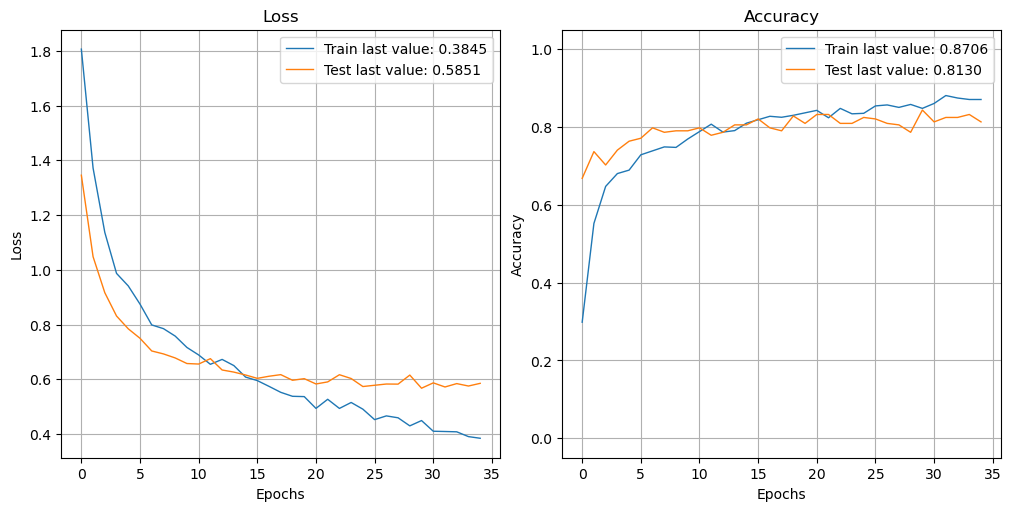

In [67]:
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt

show_history(history4)
plot_history(history4, path="standard.png")
plt.close()